In [1]:
import keras
from keras.datasets import cifar10

# The following threw an error:
#load the pre-shuffled train and test data
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


The CIFAR10 dataset was manually installed and the following code was obtained from the following link (but used some changes): 

http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/11_NN_Regularization/11_NN_Regularization.html

In [2]:
import os, sys
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path)

In [3]:
# dataset path
home = os.path.expanduser('~')
data_path = os.path.join(home, "data/CIFAR-10/")
data_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

In [4]:
# CIFAR-10 constants
img_size = 32
img_channels = 3
nb_classes = 10
# length of the image after we flatten the image into a 1-D array
img_size_flat = img_size * img_size * img_channels
nb_files_train = 5
images_per_file = 10000
# number of all the images in the training dataset
nb_images_train = nb_files_train * images_per_file

In [5]:
import urllib.request
import tarfile

In [6]:
def download_and_extract_cifar():
    if not os.path.exists(data_path):
        os.makedirs(data_path)
        
        file_path, _ = urllib.request.urlretrieve(url=data_url,
                                                  filename=os.path.join(data_path, 'cifar-10-python.tar.gz'),
                                                  reporthook=print_download_progress)
        print('\nExtracting... ', end='')
        tarfile.open(name=file_path, mode="r:gz").extractall(data_path)
        print('done')
    else:
        print("Data has already been downloaded and unpacked.")

In [7]:
def download_and_extract_cifar():
    #if not os.path.exists(data_path):
        #os.makedirs(data_path)
        
    file_path, _ = urllib.request.urlretrieve(url=data_url,filename=os.path.join(data_path, 'cifar-10-python.tar.gz'))
    print('\nExtracting... ', end='')
    tarfile.open(name=file_path, mode="r:gz").extractall(data_path)
    print('done')
    #else:
        #print("Data has already been downloaded and unpacked.")

In [8]:
filename=os.path.join(data_path, 'cifar-10-python.tar.gz')
filename

'C:\\Users\\Ellen\\data/CIFAR-10/cifar-10-python.tar.gz'

In [9]:
download_and_extract_cifar()


Extracting... done


In [10]:
import _pickle as pickle
from keras.utils import np_utils
import numpy as np

def load_data(file_name):
    file_path = os.path.join(data_path, "cifar-10-batches-py/", file_name)
    
    print('Loading ' + file_name)
    with open(file_path, mode='rb') as file:    
        data = pickle.load(file, encoding='bytes')
    raw_images = data[b'data']
    cls = np.array(data[b'labels'])
    
    images = raw_images.reshape([-1, img_channels, img_size, img_size])    
    # move the channel dimension to the last
    images = np.rollaxis(images, 1, 4)
    
    return images, cls

def load_training_data():    
    # pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[nb_images_train, img_size, img_size, img_channels], 
                      dtype=int)
    cls = np.zeros(shape=[nb_images_train], dtype=int)
    
    begin = 0
    for i in range(nb_files_train):
        images_batch, cls_batch = load_data(file_name="data_batch_" + str(i + 1))
        num_images = len(images_batch)
        end = begin + num_images
        images[begin:end, :] = images_batch
        cls[begin:end] = cls_batch
        begin = end
        
    return images, np_utils.to_categorical(cls, nb_classes)

def load_test_data():
    images, cls = load_data(file_name="test_batch")
    
    return images, np_utils.to_categorical(cls, nb_classes)

def load_cifar():
    X_train, Y_train = load_training_data()
    X_test, Y_test = load_test_data()
    
    return X_train, Y_train, X_test, Y_test

In [11]:
x_train, y_train, x_test, y_test = load_cifar()

print('\nX_train shape:', y_train.shape)
print('Y_train shape:', y_train.shape)
print('X_test shape:', x_test.shape)
print('Y_test shape:', x_test.shape)

Loading data_batch_1
Loading data_batch_2
Loading data_batch_3
Loading data_batch_4
Loading data_batch_5
Loading test_batch

X_train shape: (50000, 10)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 32, 32, 3)


In [13]:
y_train[0:10,]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])

We can see here already that this has been encoded. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

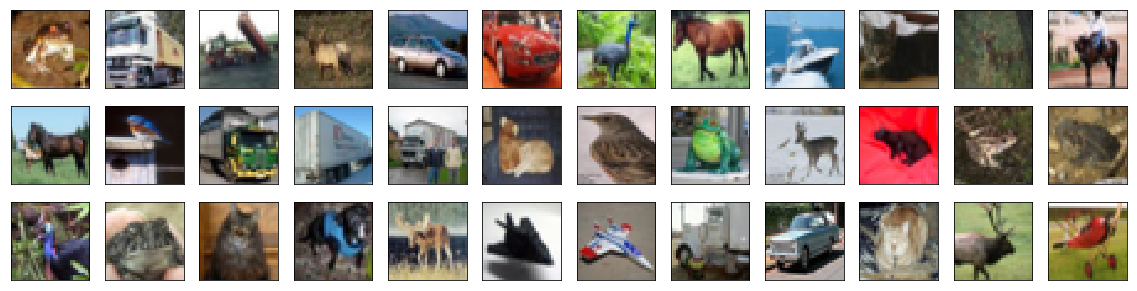

In [15]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [16]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4. Break Dataset into Training, Testing, and Validation Sets

In [17]:
num_classes =  len(np.unique(y_train))
print(num_classes) 

2


As we can see from above, the number of classes is 2 not 10, so it must have been encoded already.

In [18]:
from keras.utils import np_utils

# one-hot encode the labels
#num_classes = len(np.unique(y_train))
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the model architecture

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the model

In [26]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the model

In [27]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 61s - loss: 1.5931 - acc: 0.4210 - val_loss: 1.3733 - val_acc: 0.4954

Epoch 00001: val_loss improved from inf to 1.37329, saving model to model.weights.best.hdf5
Epoch 2/100
 - 61s - loss: 1.2850 - acc: 0.5405 - val_loss: 1.5078 - val_acc: 0.4672

Epoch 00002: val_loss did not improve
Epoch 3/100
 - 67s - loss: 1.1765 - acc: 0.5818 - val_loss: 1.1811 - val_acc: 0.5780

Epoch 00003: val_loss improved from 1.37329 to 1.18109, saving model to model.weights.best.hdf5
Epoch 4/100
 - 70s - loss: 1.1153 - acc: 0.6058 - val_loss: 1.0928 - val_acc: 0.6256

Epoch 00004: val_loss improved from 1.18109 to 1.09278, saving model to model.weights.best.hdf5
Epoch 5/100
 - 67s - loss: 1.0726 - acc: 0.6244 - val_loss: 1.0317 - val_acc: 0.6422

Epoch 00005: val_loss improved from 1.09278 to 1.03165, saving model to model.weights.best.hdf5
Epoch 6/100
 - 66s - loss: 1.0482 - acc: 0.6380 - val_loss: 0.9653 - val_acc: 0.6670

Epoch 00006: val_


Epoch 00063: val_loss did not improve
Epoch 64/100
 - 71s - loss: 1.8098 - acc: 0.3732 - val_loss: 1.5118 - val_acc: 0.4476

Epoch 00064: val_loss did not improve
Epoch 65/100
 - 78s - loss: 1.7903 - acc: 0.3806 - val_loss: 2.5414 - val_acc: 0.3064

Epoch 00065: val_loss did not improve
Epoch 66/100
 - 74s - loss: 1.8257 - acc: 0.3677 - val_loss: 1.6951 - val_acc: 0.4132

Epoch 00066: val_loss did not improve
Epoch 67/100
 - 78s - loss: 1.8285 - acc: 0.3642 - val_loss: 1.6889 - val_acc: 0.3814

Epoch 00067: val_loss did not improve
Epoch 68/100
 - 68s - loss: 1.8426 - acc: 0.3581 - val_loss: 1.5465 - val_acc: 0.4162

Epoch 00068: val_loss did not improve
Epoch 69/100
 - 64s - loss: 1.8364 - acc: 0.3622 - val_loss: 1.6212 - val_acc: 0.4144

Epoch 00069: val_loss did not improve
Epoch 70/100
 - 69s - loss: 1.8327 - acc: 0.3594 - val_loss: 1.9486 - val_acc: 0.3688

Epoch 00070: val_loss did not improve
Epoch 71/100
 - 67s - loss: 1.8402 - acc: 0.3562 - val_loss: 1.8833 - val_acc: 0.2900


### Load the weights with the best accuracy on the test set

In [32]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### Calculate Classification Accuracy on Test Set

In [29]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6651


### Visualize Some Predictions

In [30]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

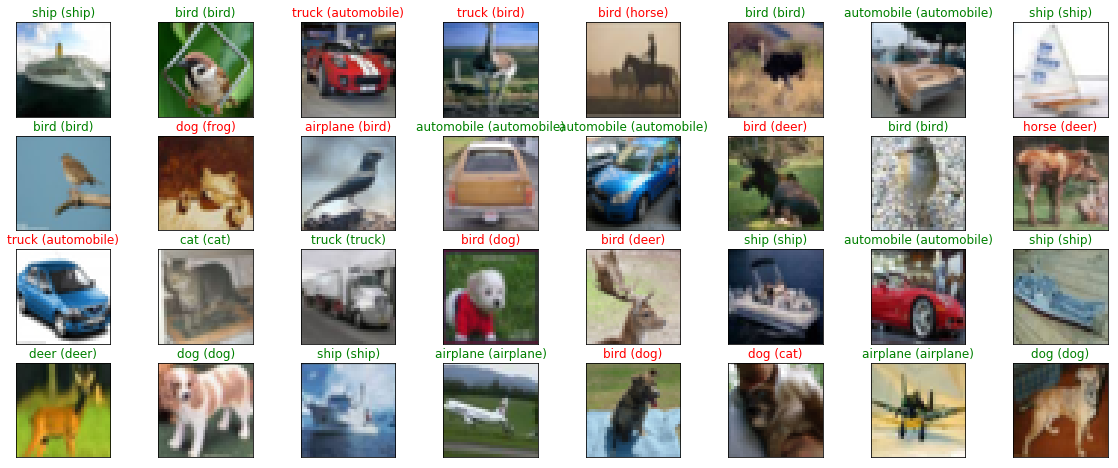

In [31]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))